# Dive Into Stack Overflow Developer Survey, 2017
# CRISP-DM Process
## Business Understanding:
After looking to the datasets, four questions related to hiring, career satisfaction and education were asked:
- Does the educational level have an impact in determining the importance of education in the career success or not?
- What Globex’s should prioritize when recruiting software developers?
- What is the percentage of career satisfaction of those who said that education is important in their career success compared to those who mentioned not important? Which group has the highest average career satisfaction ?
- Through the answers of the developers, what is the most used method in their educational process other than formal education?

## Data Understanding：
The survey of 2017 contains 154 questions and 51392 responses from 201 countries. There are 14 columns contain more that 75% of missing values. There are 7 columns doesn't have any missing values.

## Prepare Data: 
- Convert the formal education column from multiple categories to binary based on what we are looking for.
- Career satisfaction column is converted to binary (less than 5: 0, more than 5: 1)
- EducationTypes question contains more than one answer so it is need to be cleaned.

## Data Modeling: 
To answer our questions, we did not need to create ML model.

## Evaluate the Results: 
Result and discussion are published in https://medium.com/@asma.balamash/dive-into-stack-overflow-developer-survey-2017-92ce773705f3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helper as h
%matplotlib inline

In [2]:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

### 1) Data Understanding

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(51392, 154)

In [5]:
schema.shape

(154, 2)

In [6]:
schema.head(n=10)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [7]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [8]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [9]:
#Get the disciption of one column related to this question (There are other coloumns similar to this and we will see them again)
h.get_description('ImportantHiringAlgorithms',schema)

"Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Knowledge of algorithms and data structures"

In [10]:
h.get_description('FormalEducation',schema)

"Which of the following best describes the highest level of formal education that you've completed?"

In [11]:
h.get_description('EducationImportant',schema)

'Overall, how important has your formal schooling and education been to your career success?'

In [12]:
h.get_description('CareerSatisfaction',schema)

'Career satisfaction rating'

In [13]:
h.get_description('EducationTypes',schema)

'Outside of your formal schooling and education, which of the following have you done?'

### 2) Business Understanding
After looking to the datasets, four questions related to hiring, career satisfaction and education were asked:
- Does the educational level have an impact in determining the importance of education in the career success or not?
- What Globex’s should prioritize when recruiting software developers?
- What is the percentage of career satisfaction of those who said that education is important in their career success compared to those who mentioned not important? Which group has the highest average career satisfaction ?
- Through the answers of the developers, what is the most used method in their educational process other than formal education?

### 3) Prepare Data

In [14]:
possible_vals = ['Important','Not at all important',  'Not very important','Somewhat important','Very important']

def clean_and_plot(df, title='Importance of Education', plot=True):
    '''
    INPUT 
        df - a dataframe holding the EducationImportant column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the EducationImportant column.
    '''
    study = df['EducationImportant'].value_counts().reset_index()
    study.rename(columns={'index': 'Importance', 'EducationImportant': 'count'}, inplace=True)
    study_df = h.total_count(study, 'Importance', 'count', possible_vals)

    study_df.set_index('Importance', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

In [15]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral", "Professional degree"):
        return 1
    else:
        return 0

In [16]:
def career_satisfaction(career_satisfation_int):
    '''
    INPUT
        career_satisfation_int - an integer values of career_satisfaction column
    
    OUTPUT
        return 1 if the rating is larger than 5
        return 0 otherwise
    
    '''
    if career_satisfation_int > 5:
        return 1
    else:
        return 0

In [17]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)

In [18]:
df['HighRateSatisfaction'] = df["CareerSatisfaction"].apply(career_satisfaction)

In [19]:
df[['HigherEd', 'HighRateSatisfaction']].head()

,HigherEd,HighRateSatisfaction
0,0,0
1,0,0
2,0,1
3,0,1
4,1,1


### 4) Answers

#### Question1: Does the educational level have an impact in determining the importance of education in the career success or not?

In [20]:
ed_1 = df[df['HigherEd'] == 1] # Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd'] == 0] # Subset df to only those with HigherEd of 0

In [21]:
ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
Importance,,,
Important,0.327335,0.223872,0.103463
Somewhat important,0.275642,0.267022,0.00861969
Very important,0.214297,0.139543,0.0747544
Not very important,0.139702,0.22857,-0.0888675
Not at all important,0.0430231,0.140993,-0.0979699


#### Question2: What Globex's should prioritize when recruiting software developers? What are the important things that should be taken into consideration during hiring?
Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process?

* ImportantHiringAlgorithms - Knowledge of algorithms and data structures
* ImportantHiringTechExp	- Experience with specific tools (libraries, frameworks, etc.) used by the employer
* ImportantHiringCommunication - Communication skills
* ImportantHiringOpenSource- Contributions to open source projects
* ImportantHiringPMExp - Experience with specific project management tools & techniques
* ImportantHiringCompanies - Previous companies worked at
* ImportantHiringTitles - Previous job titles held
* ImportantHiringEducation - Educational credentials (e.g. schools attended, specific field of study, grades earned)
* ImportantHiringRep - Stack Overflow reputation
* ImportantHiringGettingThingsDone - Track record of getting things done

##### 1. we will save the name of related columns in cols variable excpept the first one.

In [22]:
#cols = ['ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 'ImportantHiringOpenSource', 'ImportantHiringPMExp', 'ImportantHiringCompanies', 'ImportantHiringTitles' , 'ImportantHiringEducation', 'ImportantHiringRep', 'ImportantHiringGettingThingsDone']
#save the coloumns required in cols variable
cols = ['ImportantHiringTechExp', 'ImportantHiringCommunication', 'ImportantHiringOpenSource', 'ImportantHiringPMExp', 'ImportantHiringCompanies', 'ImportantHiringTitles' , 'ImportantHiringEducation', 'ImportantHiringRep', 'ImportantHiringGettingThingsDone']

In [23]:
#text = 'ImportantHiringCommunication'
#text[15:]

##### 2. We will take the ratio of importance for all columns.

In [24]:
# save the first column in the dataframe and then merge it with other columns
#df_hiring = df['ImportantHiringAlgorithms'].value_counts().reset_index()
df_hiring = df['ImportantHiringAlgorithms'].value_counts()/(df.shape[0]-sum(df['ImportantHiringAlgorithms'].isnull()))
df_hiring = df_hiring.reset_index()
df_hiring.rename(columns={'ImportantHiringAlgorithms': 'Algorithms'}, inplace=True)
for col in cols:
    #print(col)
    new_name = col[15:]
    #df_temp = df[col].value_counts().reset_index()
    df_temp = df[col].value_counts()/(df.shape[0]-sum(df[col].isnull()))
    df_temp = df_temp.reset_index()
    df_temp.rename(columns={col:new_name}, inplace=True)
    #print(df_temp)
    df_hiring=df_hiring.merge(df_temp, on="index")

In [25]:
df_hiring.rename(columns={'index': 'Importance'}, inplace=True)

df_hiring.set_index('Importance', inplace=True)

In [26]:
df_hiring

,Algorithms,TechExp,Communication,OpenSource,PMExp,Companies,Titles,Education,Rep,GettingThingsDone
Importance,,,,,,,,,,
Important,0.413798,0.375758,0.458675,0.189502,0.226683,0.195811,0.187161,0.189199,0.089908,0.446768
Somewhat important,0.275470,0.324388,0.165858,0.363967,0.345913,0.410570,0.375932,0.384956,0.265323,0.164582
Very important,0.225648,0.158605,0.341318,0.052909,0.060768,0.032396,0.029909,0.035446,0.022643,0.347592
Not very important,0.073075,0.123440,0.028981,0.304098,0.282350,0.291493,0.298147,0.288944,0.377455,0.032825
Not at all important,0.012010,0.017809,0.005168,0.089523,0.084286,0.069730,0.108850,0.101455,0.244671,0.008233


In [27]:
#Test
# df['ImportantHiringTechExp'].value_counts()/df.shape[0]
# sum(df['ImportantHiringTechExp'].isnull())
# sum(~df['ImportantHiringTechExp'].isnull())
# test = df['ImportantHiringTechExp'].value_counts()/(df.shape[0]-sum(df['ImportantHiringTechExp'].isnull()))
# test
# test.reset_index()

In [28]:
# test1 = df['ImportantHiringRep'].value_counts().reset_index()
# test2 = df['ImportantHiringGettingThingsDone'].value_counts().reset_index()
# test3 = test1.merge(test2, on="index")
# test3.set_index('index', inplace=True)
# test3.plot(kind="bar")

In [29]:
#df_hiring.max()

##### 3. Draw the datafram and see the result

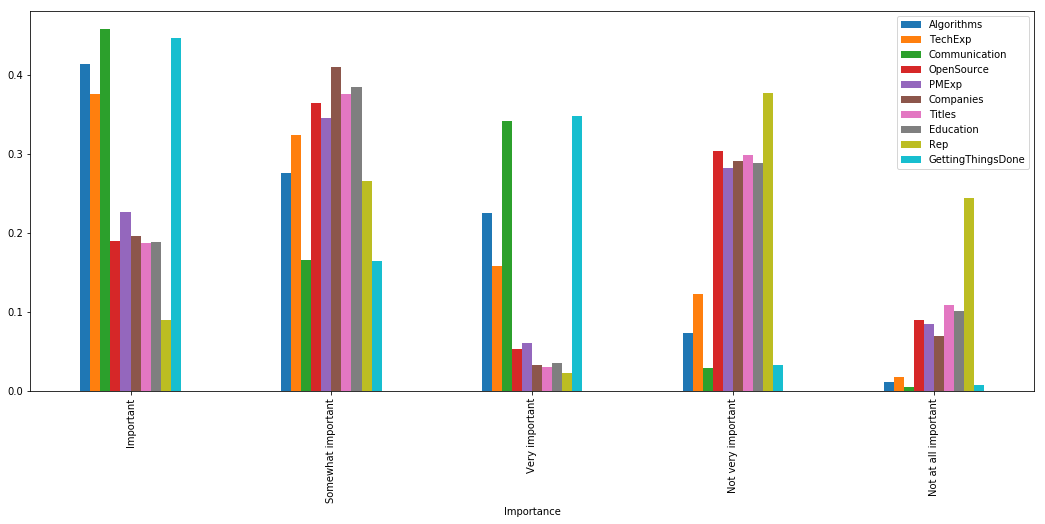

In [30]:
df_hiring.plot(figsize=(18,7),kind="bar")

#### Question3: What is the percentage of career satisfaction of those who said that education is important in their career success compared to those who mentioned not important? Which group has the highest average career satisfaction ?

In [31]:
df.CareerSatisfaction.value_counts()

8.0     11037
7.0      9384
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64

In [32]:
Edu_career = df.groupby('EducationImportant').mean()['CareerSatisfaction'].sort_values().reset_index().set_index('EducationImportant')

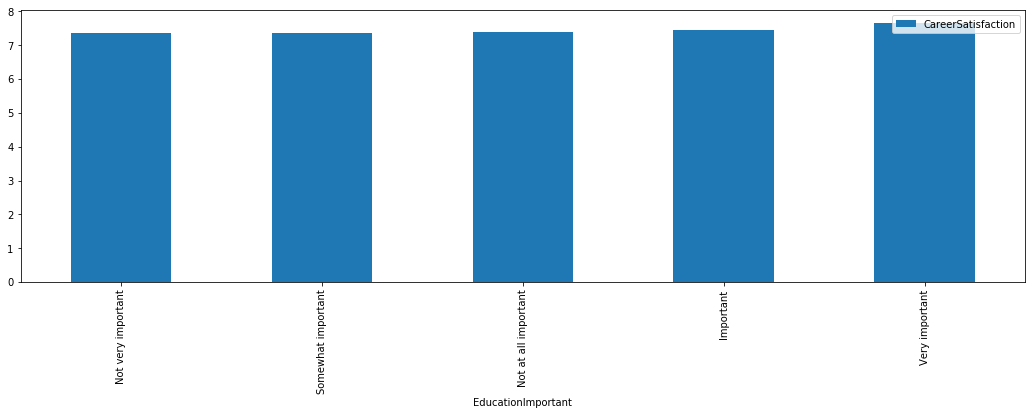

In [33]:
Edu_career.plot(figsize=(18,5),kind="bar")

In [34]:
career_sat_1 = df[df['HighRateSatisfaction'] == 1] # Subset df to only those with career satisfaction more than 5
career_sat_0 = df[df['HighRateSatisfaction'] == 0] # Subset df to only those with career satisfaction less than 5

In [35]:
career_sat_1_perc = clean_and_plot(career_sat_1, 'Higher Rate', plot=False)
career_sat_0_perc = clean_and_plot(career_sat_0, 'Lower Rate', plot=False)

comp_df = pd.merge(career_sat_1_perc, career_sat_0_perc, left_index=True, right_index=True)
comp_df.columns = ['career_sat_1_perc', 'career_sat_0_perc']
comp_df['Diff_HighRateSatisfaction_Vals'] = comp_df['career_sat_1_perc'] - comp_df['career_sat_0_perc']
comp_df.style.bar(subset=['Diff_HighRateSatisfaction_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,career_sat_1_perc,career_sat_0_perc,Diff_HighRateSatisfaction_Vals
Importance,,,
Somewhat important,0.269629,0.266951,0.00267807
Important,0.252783,0.238782,0.0140015
Not very important,0.205201,0.206027,-0.000825401
Very important,0.16161,0.142483,0.0191269
Not at all important,0.110777,0.145758,-0.034981


#### Question 4: Through the answers of the developers, what is the most used method in their educational process other than formal education?

In [36]:
df.EducationImportant.value_counts()

Somewhat important      6289
Important               5861
Not very important      4795
Very important          3716
Not at all important    2694
Name: EducationImportant, dtype: int64

In [37]:
possible_vals = ['Self-taught', 'Online course', 'Open source contributions', 'On-the-job training', 'Hackathon', 'Coding competition', 'Part-time/evening course', 'Industry certification', 'Bootcamp']
educationType_df = df.EducationTypes.value_counts().reset_index()
educationType_df.rename(columns={'index': 'method', 'EducationTypes': 'count'}, inplace=True)
educationType_count_df = h.total_count(educationType_df, 'method', 'count', possible_vals)
educationType_count_df.set_index('method', inplace=True)

In [38]:
educationType_count_df

,count
method,
Self-taught,27330
Online course,13792
On-the-job training,12508
Open source contributions,11225
Hackathon,7150
Coding competition,6683
Part-time/evening course,4654
Industry certification,4472
Bootcamp,2727


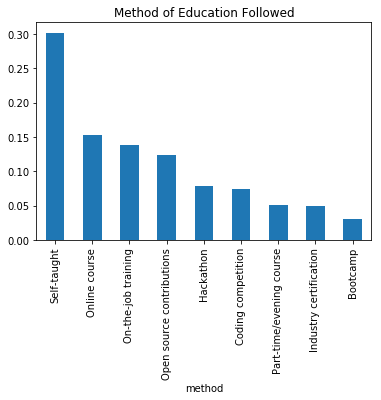

In [39]:
(educationType_count_df/educationType_count_df.sum()).plot(kind='bar', legend=None);
plt.title('Method of Education Followed');
plt.show()